Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

Get Data

In [6]:
Mtrain = pd.read_csv('/content/train (1).csv')
Mtest= pd.read_csv('/content/test (2).csv')



Preparing Data




In [10]:
Mtrain.head(3)

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10


In [11]:
Mtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [12]:
Mtrain.isnull().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

DATA Cleaning

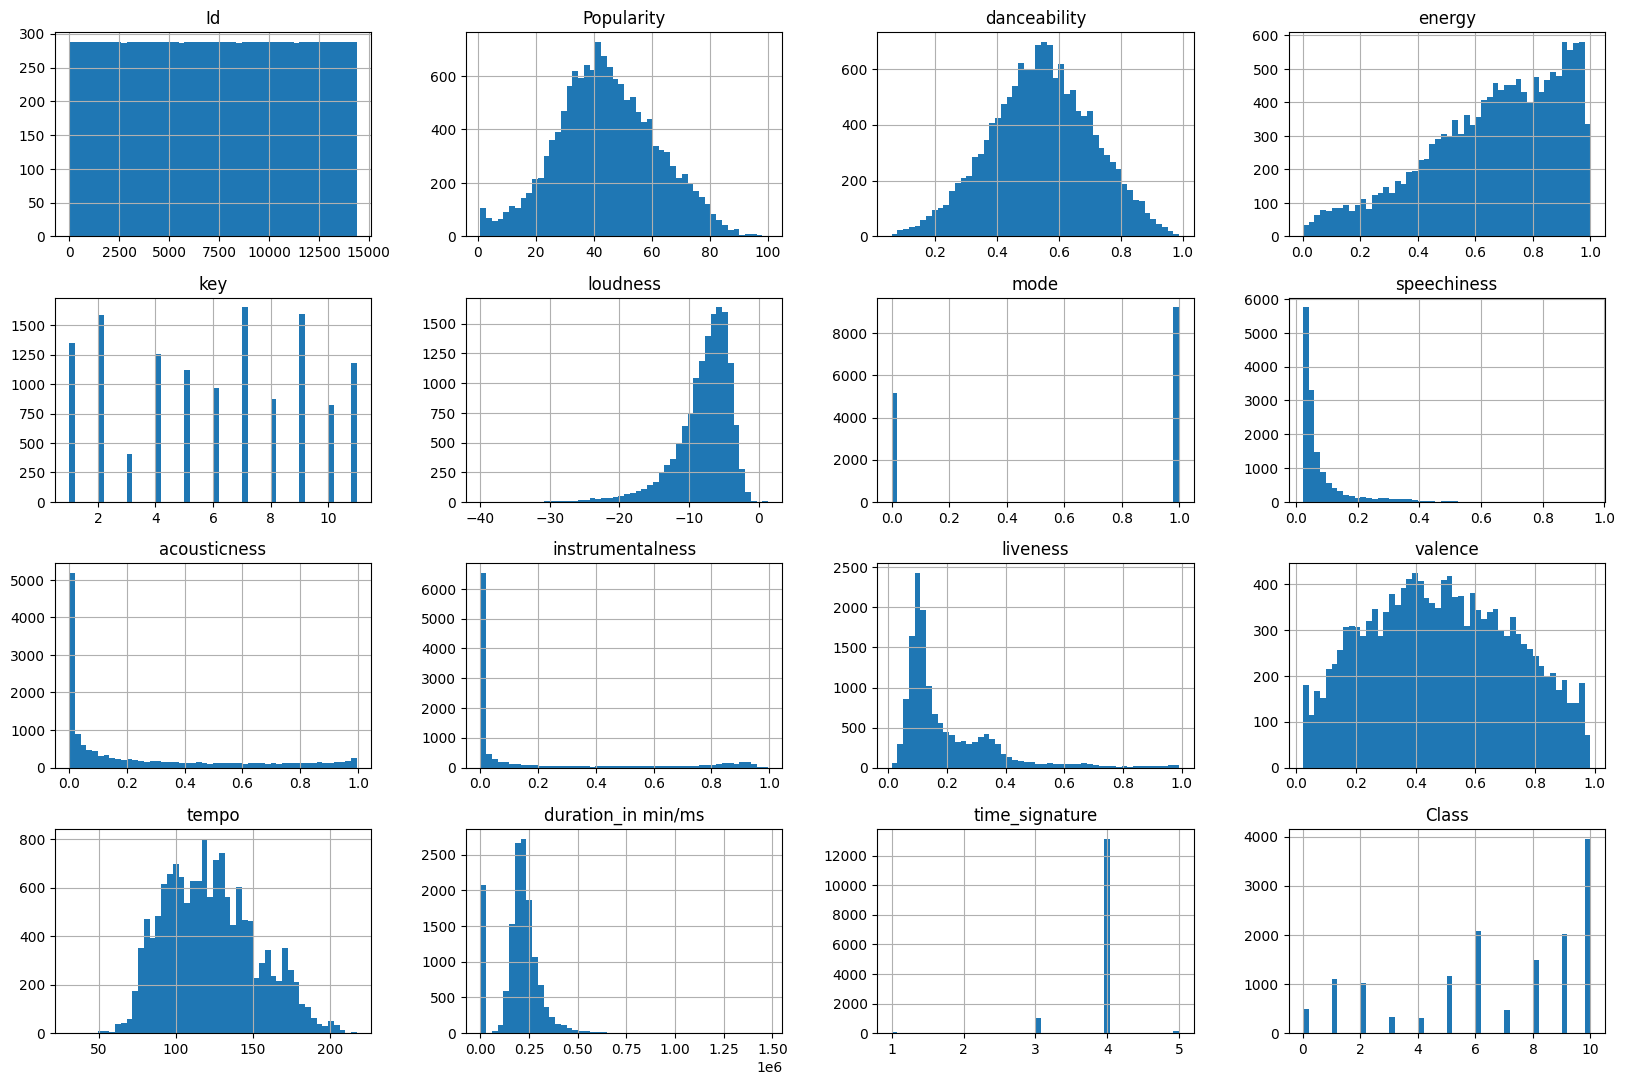

In [13]:
Mtrain.hist(bins=50, figsize=(20, 13))
plt.show()

dropna est une méthode de pandas qui est utilisée pour éliminer les valeurs manquantes.

In [14]:
Mtrain = Mtrain.dropna(subset=['Popularity', 'key', 'instrumentalness'])


In [16]:
Mtrain.isnull().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

<ipython-input-17-400c93eb3631>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Mtrain.corr()


<Axes: >

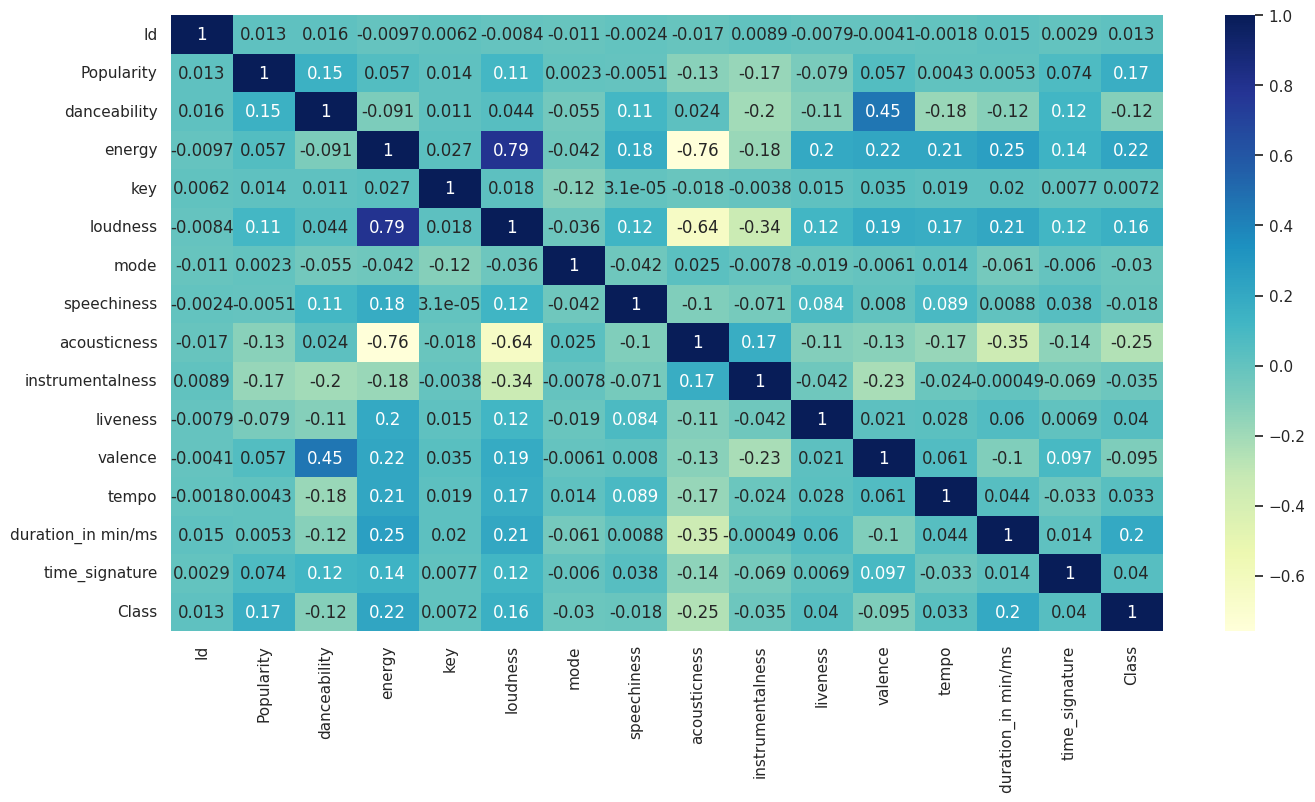

In [17]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = Mtrain.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

In [18]:
correlation_matrix = Mtrain.corr()
print(correlation_matrix)

                          Id  Popularity  danceability    energy       key  \
Id                  1.000000    0.012540      0.015522 -0.009748  0.006192   
Popularity          0.012540    1.000000      0.150423  0.056658  0.014157   
danceability        0.015522    0.150423      1.000000 -0.091171  0.011338   
energy             -0.009748    0.056658     -0.091171  1.000000  0.027024   
key                 0.006192    0.014157      0.011338  0.027024  1.000000   
loudness           -0.008394    0.107584      0.043601  0.793044  0.018124   
mode               -0.011354    0.002349     -0.055355 -0.041969 -0.116908   
speechiness        -0.002377   -0.005086      0.106994  0.180759  0.000031   
acousticness       -0.016540   -0.127827      0.023827 -0.758749 -0.017613   
instrumentalness    0.008891   -0.169138     -0.203031 -0.175861 -0.003804   
liveness           -0.007905   -0.078768     -0.113663  0.197962  0.015359   
valence            -0.004059    0.057260      0.454353  0.215924

<ipython-input-18-e5b46ce54484>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Mtrain.corr()


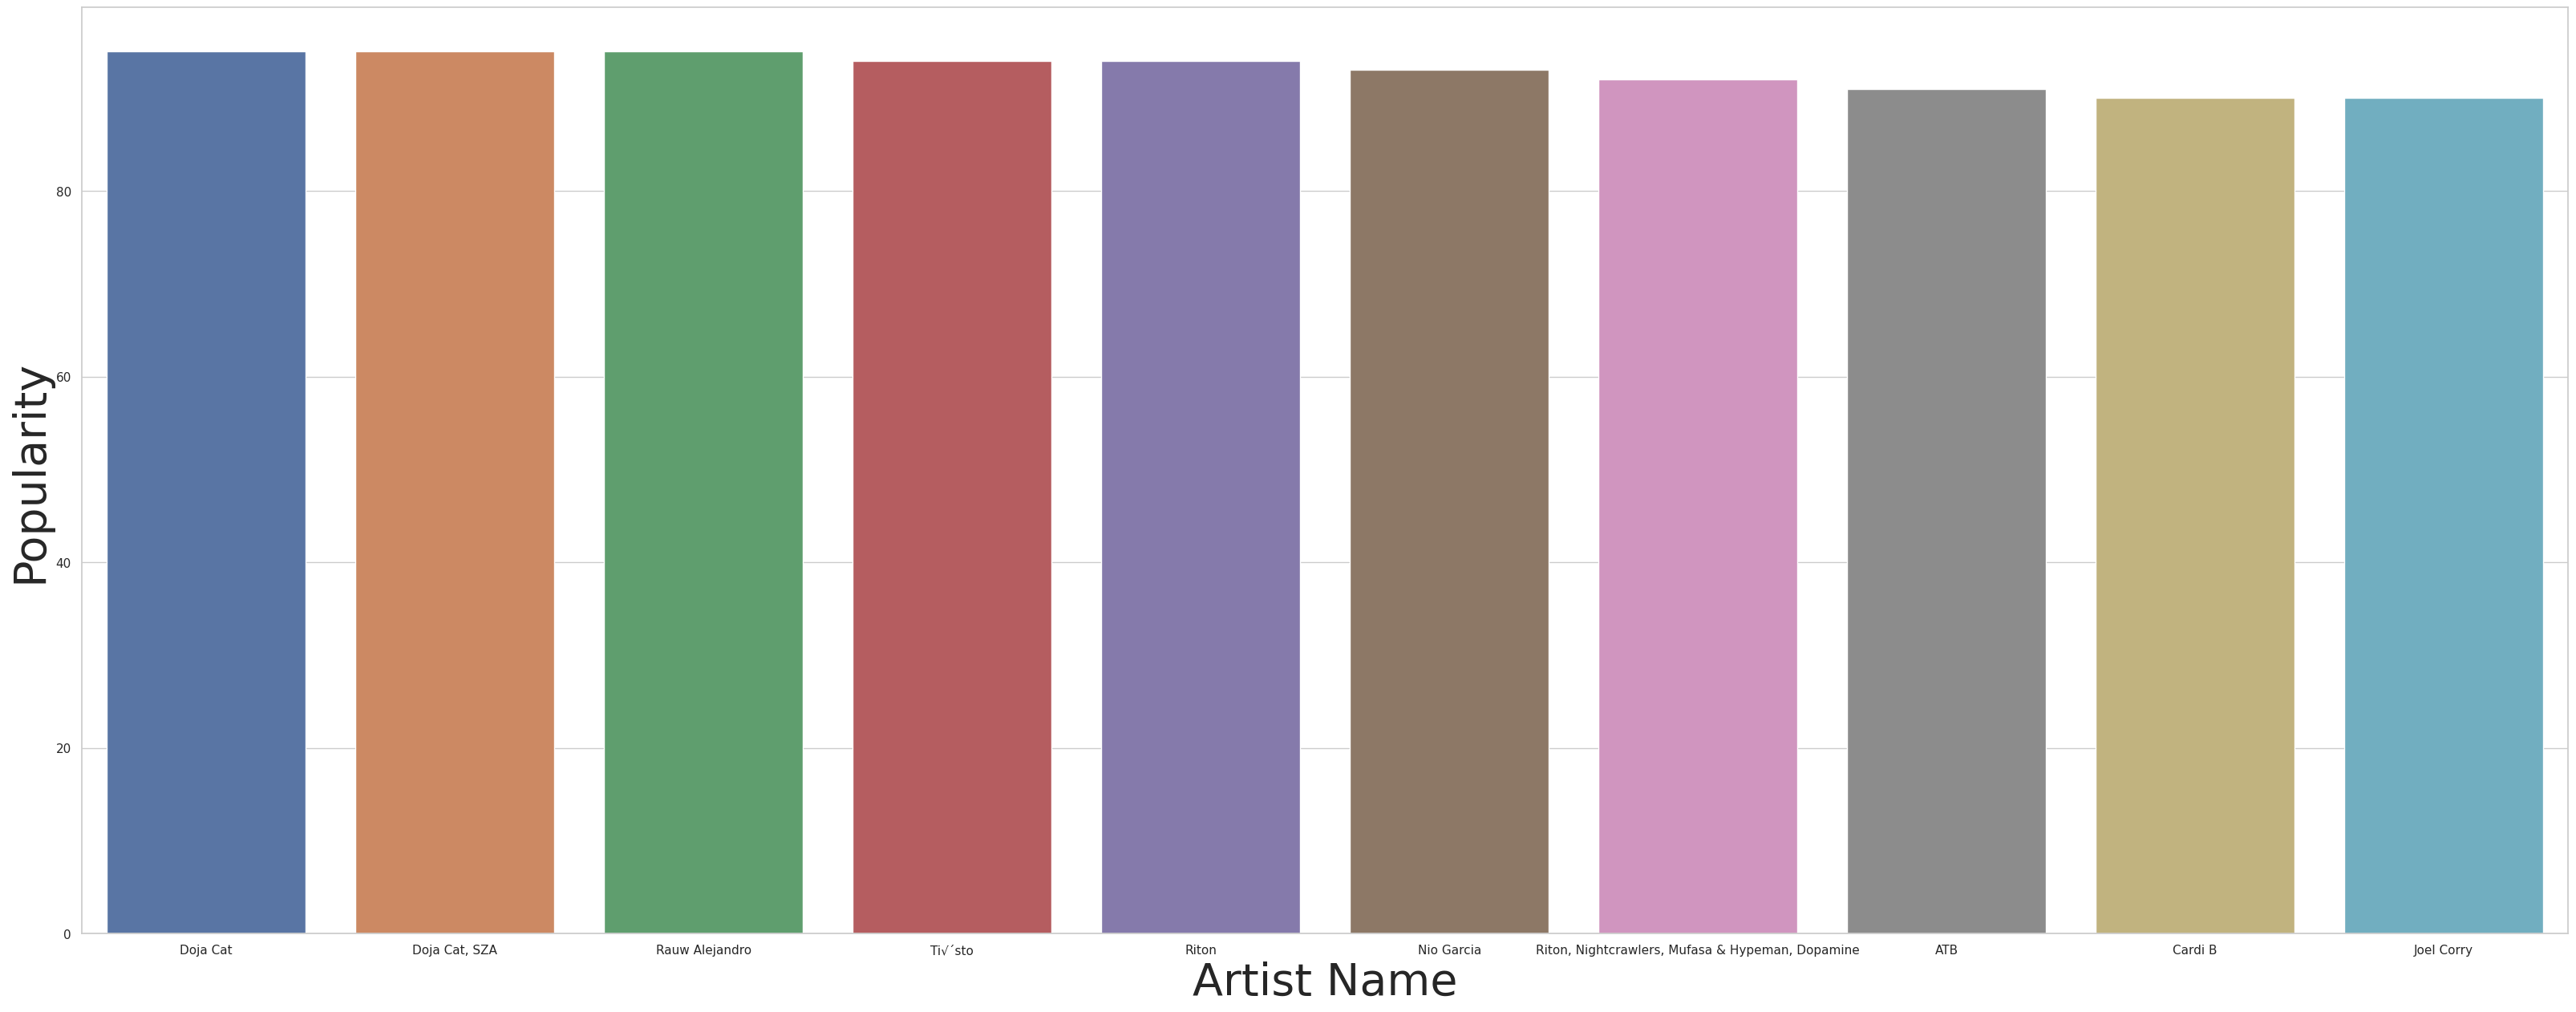

In [19]:
plt.figure(figsize=(40, 15))
sns.set(style="whitegrid")

x = Mtrain.groupby("Artist Name")["Popularity"].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=x.index, y=x)

axis.set_ylabel('Popularity', fontsize=40)
axis.set_xlabel('Artist Name', fontsize=40)

plt.show()

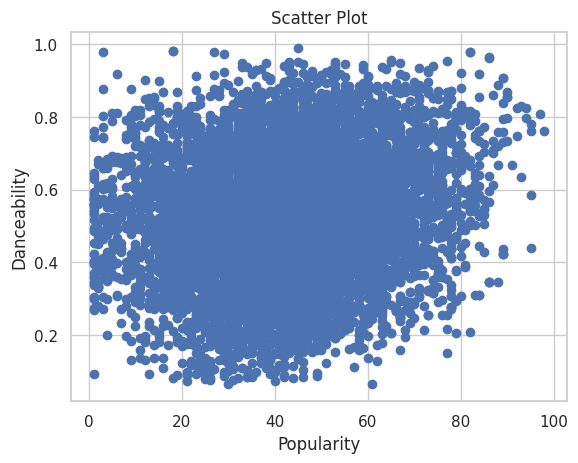

In [20]:
plt.scatter(Mtrain['Popularity'], Mtrain['danceability'])
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('Scatter Plot')
plt.show()

In [23]:
categorical_columns = ['Artist Name', 'Track Name']
categorical_columns = [col.strip() for col in categorical_columns]
Mtrain = Mtrain.drop(categorical_columns, axis=1)

In [39]:
from sklearn.model_selection import train_test_split

# Sélectionner les variables indépendantes (features) comme X
X = Mtrain.drop('Class', axis=1)

# Sélectionner la variable cible comme y
y = Mtrain['Class']

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.impute import SimpleImputer

Mtrain.fillna(0, inplace=True)
Mtest.fillna(0, inplace=True)

Train modele with BaggingClassifier

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Supposons que vous ayez déjà défini X_train, X_val, y_train, y_val
# à l'aide de train_test_split ou d'une méthode similaire

# Créer un modèle de base (DecisionTreeClassifier dans ce cas)
base_model = DecisionTreeClassifier()

# Créer un modèle de bagging en utilisant le modèle de base
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Entraîner le modèle de bagging sur les données d'entraînement
bagging_model.fit(X_train, y_train)

# Faire des prédictions sur les données de validation
predictions_val = bagging_model.predict(X_val)






In [35]:
accuracy = accuracy_score(y_val, predictions_val)
print("Accuracy:", accuracy)

Accuracy: 0.4466277217206585


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming predictions_val is the variable where you stored the model predictions on the validation set
predictions_val = bagging_model.predict(X_val)

precision = precision_score(y_val, predictions_val, average='weighted')
recall = recall_score(y_val, predictions_val, average='weighted')
f1 = f1_score(y_val, predictions_val, average='weighted')

# Print or use the precision, recall, and f1 scores as needed
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.44575102389373183
Recall: 0.4466277217206585
F1 Score: 0.445200491811783


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val, rf_predictions)
precision = precision_score(y_val, rf_predictions, average='weighted')
recall = recall_score(y_val, rf_predictions, average='weighted')
f1 = f1_score(y_val, rf_predictions, average='weighted')

print("Accuracy:", accuracy)
print("Précision :", precision)
print("Rappel :", recall)
print("Score F1 :", f1)


Accuracy: 0.48964418481147104
Précision : 0.47917896093514506
Rappel : 0.48964418481147104
Score F1 : 0.4765160834169359


In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Créer et entraîner le modèle GBM
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_val)

# Calculer les métriques de performance
accuracy = accuracy_score(y_val, predictions)
precision = precision_score(y_val, predictions, average='weighted')
recall = recall_score(y_val, predictions, average='weighted')
f1 = f1_score(y_val, predictions, average='weighted')

# Afficher les résultats
print("Accuracy:", accuracy)
print("Précision :", precision)
print("Rappel :", recall)
print("Score F1 :", f1)


Accuracy: 0.5262878385554965
Précision : 0.5311580368279144
Rappel : 0.5262878385554965
Score F1 : 0.5008305579606249


In [59]:
preprocess_new_data=Mtest.dropna(subset=['Popularity', 'key', 'instrumentalness'])

categorical_columns = ['Artist Name', 'Track Name']
categorical_columns = [col.strip() for col in categorical_columns]
preprocess_new_data = preprocess_new_data.drop(categorical_columns, axis=1)


In [61]:
# Suppression des lignes contenant des valeurs manquantes dans certaines colonnes
preprocess_new_data = Mtest.dropna(subset=['Popularity', 'key', 'instrumentalness'])

# Suppression des colonnes catégorielles
categorical_columns = ['Artist Name', 'Track Name']
categorical_columns = [col.strip() for col in categorical_columns]
preprocess_new_data = preprocess_new_data.drop(categorical_columns, axis=1)

# Ensuite, vous pouvez faire des prédictions sur les nouvelles données prétraitées
features_new_data = preprocess_new_data  # Utilisez les caractéristiques prétraitées
predictions_new_data = xgb_model.predict(features_new_data)

# Afficher les prédictions
print("Predictions on new data:")
print(predictions_new_data)


Predictions on new data:
[6 6 9 ... 1 2 6]
